** This file is to get house sale data and create graphs **
1. Import the city data
2. Determine the year 
2. Calculate the house price of the year
3. Get the house price of the cities 
4. Create scatter graphs and maps 

In [1]:
%matplotlib inline
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import folium

In [2]:
#csvpath = os.path.join('..', 'Resources', 'accounting.csv')
file_name_sale = 'Sale_Prices_City.csv'
file_name_city = 'city_list.csv'

final_file = 'housing_city.csv'

COLLECTED_YEAR = ['2016','2017']
# CITY = ['Atlanta', 'Chicago', 'Dallas', 'Denver', 'Detroit', 'Los Angeles','Miami', 'Philadelphia', 'New York']
# STATE = ['Georgia', 'Illinois', 'Texas', 'Colorado', 'Michigan', 'California','Florida', 'Pennsylvania', 'New York']
# CITY_STATE = pd.DataFrame({
#     "city":CITY,
#     "state":STATE
# })
    

In [3]:
CITY_STATE = pd.read_csv(file_name_city)
# for column in CITY_STATE.keys():
#     CITY_STATE[column] = CITY_STATE[column].str.strip()

In [4]:
CITY_STATE.head()

,city,State,ratio%,Region,latitude,longitude,spending,weekly wage,State Code
0,New York,New York,2.98,Northeast,40.7528,-73.9725,742,1015.05,NY
1,Los Angeles,California,2.80,West,34.0396,-118.2661,823,996.51,CA
2,San Diego,California,3.12,West,32.9014,-117.2079,1137,1037.31,CA
3,San Jose,California,2.58,West,37.3239,-121.9144,0,1579.40,CA
4,San Francisco,California,1.42,West,37.7353,-122.3732,842,1320.66,CA


In [5]:
sale_data = pd.read_csv(file_name_sale)

In [6]:
sale_data.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,6181.0,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,555900.0,555200.0,558500.0,547000.0,547100.0,552000.0,565300.0,573500.0,579200.0,582600.0
1,12447.0,Los Angeles,California,2,494300.0,485100.0,465700.0,454000.0,435100.0,421000.0,...,658100.0,652800.0,656600.0,658600.0,678800.0,689000.0,681700.0,688100.0,697900.0,713400.0
2,17426.0,Chicago,Illinois,3,328700.0,321400.0,292500.0,277000.0,270200.0,266900.0,...,267000.0,267200.0,263600.0,268300.0,273300.0,279400.0,279800.0,288700.0,307200.0,309300.0
3,13271.0,Philadelphia,Pennsylvania,4,108400.0,108800.0,110200.0,110400.0,107800.0,111200.0,...,141400.0,143000.0,143200.0,145300.0,149800.0,152100.0,157200.0,152100.0,148900.0,NaN
4,40326.0,Phoenix,Arizona,5,223500.0,214900.0,205600.0,194400.0,185200.0,176300.0,...,214800.0,220400.0,223200.0,223900.0,226800.0,231300.0,237500.0,240500.0,241200.0,NaN


In [7]:
# initiate df - for all months 
clean_sale_data = pd.DataFrame({
    'RegionName' : sale_data['RegionName'],
    'StateName' : sale_data['StateName']
})

# for only yearly price
simple_df = pd.DataFrame({
    'RegionName' : sale_data['RegionName'],
    'StateName' : sale_data['StateName']
})
  
simple_df.head()  

,RegionName,StateName
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Philadelphia,Pennsylvania
4,Phoenix,Arizona


In [8]:
# get data of wanted months 
for data_year in sale_data.columns[4:]:
    for year_wanted in COLLECTED_YEAR:
        if data_year[0:4] == year_wanted:
            clean_sale_data[data_year] = sale_data[data_year]
            

In [9]:
# Manuel's sample code for above function
# keep_columns = [x for x in sale_data.columns if x.split("-")[0] in COLLECTED_YEAR]
# sale_data[keep_columns].head()

In [10]:
clean_sale_data.head()

,RegionName,StateName,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,New York,New York,539200.0,565800.0,573700.0,584500.0,557200.0,550400.0,545900.0,540500.0,...,539000.0,538000.0,545000.0,541700.0,555900.0,555200.0,558500.0,547000.0,547100.0,552000.0
1,Los Angeles,California,579700.0,581400.0,582100.0,592200.0,592600.0,594000.0,587300.0,594700.0,...,636700.0,639200.0,645400.0,646800.0,658100.0,652800.0,656600.0,658600.0,678800.0,689000.0
2,Chicago,Illinois,264200.0,273800.0,277500.0,280200.0,274700.0,269900.0,270900.0,273600.0,...,310900.0,303000.0,289400.0,274300.0,267000.0,267200.0,263600.0,268300.0,273300.0,279400.0
3,Philadelphia,Pennsylvania,122400.0,122900.0,124200.0,116300.0,117600.0,118900.0,120900.0,121400.0,...,133400.0,138100.0,139400.0,144000.0,141400.0,143000.0,143200.0,145300.0,149800.0,152100.0
4,Phoenix,Arizona,200100.0,199200.0,204000.0,206000.0,205800.0,202500.0,203100.0,207100.0,...,221700.0,219500.0,215000.0,210500.0,214800.0,220400.0,223200.0,223900.0,226800.0,231300.0


In [11]:
# get yearly sale price
for i in range(len(clean_sale_data)):
    for year_wanted in COLLECTED_YEAR:
        Jan = year_wanted + '-01'
        Dec = year_wanted + '-12'
        yearly_wanted_sale = np.mean(clean_sale_data.loc[i, Jan:Dec])
        clean_sale_data.loc[i, year_wanted] = yearly_wanted_sale
        simple_df.loc[i, year_wanted] = yearly_wanted_sale.round(1)
    

In [12]:
CITY_STATE.head()

,city,State,ratio%,Region,latitude,longitude,spending,weekly wage,State Code
0,New York,New York,2.98,Northeast,40.7528,-73.9725,742,1015.05,NY
1,Los Angeles,California,2.80,West,34.0396,-118.2661,823,996.51,CA
2,San Diego,California,3.12,West,32.9014,-117.2079,1137,1037.31,CA
3,San Jose,California,2.58,West,37.3239,-121.9144,0,1579.40,CA
4,San Francisco,California,1.42,West,37.7353,-122.3732,842,1320.66,CA


In [13]:
# CITY_STATE.city[0]
# CITY_STATE.state[0]

In [14]:
# get the cities we want 
final_df = pd.merge(simple_df, CITY_STATE, left_on=["RegionName","StateName"], right_on=["city", "State"], how="inner")
final_df.count()

RegionName     38
StateName      38
2016           38
2017           38
city           38
State          38
ratio%         38
Region         38
latitude       38
longitude      38
spending       38
weekly wage    38
State Code     38
dtype: int64

In [15]:
columns = ['RegionName', 'StateName']
final_output = final_df.drop(columns = columns)
final_output.to_csv(final_file, index=False)

In [16]:
# final_df['color'] = final_df.Region.map({
#     "Northeast": 'cool',
#     "Midwest":'binary',
#     "South":'bone_r',
#     "West":'autumn'
# })

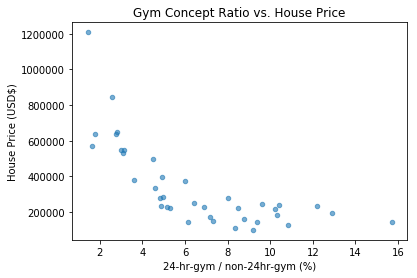

In [17]:
ax1 = final_df.plot(kind='scatter',x='ratio%',y='2017',alpha=0.6,linewidth=1)
ax1.set_title('Gym Concept Ratio vs. House Price')
ax1.set_ylabel('House Price (USD$)')
ax1.set_xlabel('24-hr-gym / non-24hr-gym (%)')

plt.savefig('houseprice_gym.png')


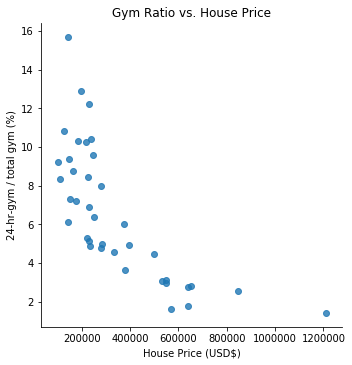

In [57]:

ax2 = sns.lmplot(x='2017', y='ratio%', data=final_df, fit_reg=False) #palette='colorblind', hue='Region') 
ax2.set_xlabels('House Price (USD$)')
ax2.set_ylabels('24-hr-gym / total gym (%)')

plt.title('Gym Ratio vs. House Price')

plt.savefig('houseprice_gym.png')





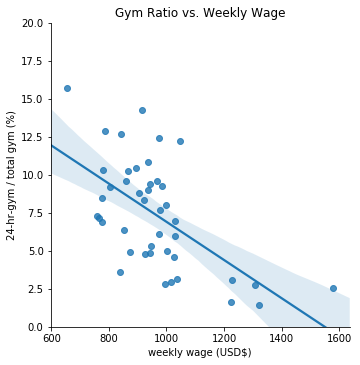

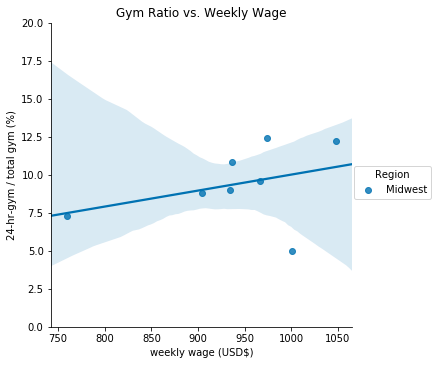

In [63]:
wage_df = CITY_STATE[CITY_STATE['weekly wage'] != 0] #omit cities without wage data
MW_region = wage_df[wage_df.Region == 'Midwest']
S_region = wage_df[wage_df.Region == 'South']
NE_region = wage_df[wage_df.Region == 'Northeast']
W_region = wage_df[wage_df.Region == 'West']
S_NE_W = pd.concat([S_region,NE_region, W_region], join='outer')

ax3 = sns.lmplot(x='weekly wage', y='ratio%', data=wage_df, fit_reg=True) #, palette='colorblind', hue='Region') 
plt.ylim(0,20)

ax3.set_xlabels('weekly wage (USD$)')
ax3.set_ylabels('24-hr-gym / total gym (%)')
plt.title('Gym Ratio vs. Weekly Wage')
plt.savefig('weeklywage_gym.png')

ax4 = sns.lmplot(x='weekly wage', y='ratio%', data=MW_region, fit_reg=True, palette='colorblind', hue='Region') 
plt.ylim(0,20)

ax3.set_xlabels('weekly wage (USD$)')
ax3.set_ylabels('24-hr-gym / total gym (%)')
plt.title('Gym Ratio vs. Weekly Wage')
plt.savefig('weeklywage_gym_neg.png')

ax4.set_xlabels('weekly wage (USD$)')
ax4.set_ylabels('24-hr-gym / total gym (%)')
plt.title('Gym Ratio vs. Weekly Wage')

plt.savefig('weeklywage_gym_pos.png')


C:\Users\Sophia_CY_Kang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\Sophia_CY_Kang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Sophia_CY_Kang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Sophia_CY_Kang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


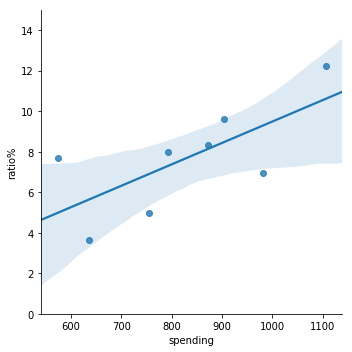

In [55]:
spending_df = CITY_STATE[CITY_STATE.spending != 0]  #omit cities without spending data

MW_region = spending_df[wage_df.Region == 'Midwest']
S_region = spending_df[wage_df.Region == 'South']
NE_region = spending_df[wage_df.Region == 'Northeast']
W_region = spending_df[wage_df.Region == 'West']
NE_W = pd.concat([NE_region, W_region], join='outer')
MW_S = pd.concat([MW_region, S_region], join='outer')

ax4 = sns.lmplot(x='spending', y='ratio%', data=MW_S, fit_reg=True)# palette='colorblind', hue='Region') 
plt.ylim(0,15)

# ax4.set_xlabels('annual spending on personal care & service (USD$)')
# ax4.set_ylabels('24-hr-gym / non-24hr-gym (%)')
# plt.title('Gym Ratio vs. Annual Spending')

plt.savefig('spending_gym.png')


In [ ]:
CITY_STATE.head(1)

In [ ]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(CITY_STATE)):
   folium.Circle(
      location=[CITY_STATE.iloc[i]['latitude'], CITY_STATE.iloc[i]['longitude']],
      popup=CITY_STATE.iloc[i]['city'],
      radius=CITY_STATE.iloc[i]['ratio%']*10000,
      color='orange',
      fill=True,
      fill_color='yellow'
   ).add_to(m)

m.save('mymap_GymRatio.html')


In [ ]:
test_df = spending_df.sort_values('spending').reset_index()
test_df.plot(x='city',y='spending',kind='bar')